In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
!ls /content/gdrive/MyDrive/A1/

results_1.csv  Task_1.ipynb  Task3.ipynb    Задания_1_2.xlsx
results_2.csv  Task_2.ipynb  Задание_3.zip


In [5]:
!unzip /content/gdrive/MyDrive/A1/Задание_3.zip

Archive:  /content/gdrive/MyDrive/A1/Задание_3.zip
  inflating: Charges.csv             
  inflating: Suspended.csv           
  inflating: Tariff_plans_change.csv  


In [6]:
df_Charges = pd.read_csv('Charges.csv')

In [7]:
df_Charges.nunique()

SUBSCRIBER_ID     5989
BILL_MONTH          19
CHARGES          17463
dtype: int64

In [8]:
print(f"Duplicated rows: {df_Charges.duplicated(keep=False).sum()}")

Duplicated rows: 0


In [9]:
df_Susp = pd.read_csv('Suspended.csv')

In [10]:

df_Susp.nunique()

SUBSCRIBER_ID    1310
START_DT          566
END_DT            584
STATUS              1
dtype: int64

In [11]:
print(f"Duplicated rows: {df_Susp.duplicated(keep=False).sum()}")

Duplicated rows: 0


In [12]:
df_Tariff = pd.read_csv('Tariff_plans_change.csv')

In [13]:
print(f"Duplicated rows: {df_Tariff.duplicated(keep=False).sum()}")

Duplicated rows: 114


In [14]:
df_Tariff.drop_duplicates(inplace=True)
print(f"Duplicated rows: {df_Tariff.duplicated(keep=False).sum()}")

Duplicated rows: 0


In [15]:
df_Tariff.nunique()

SUBSCRIBER_ID      5989
TARIFF_PLAN_ID        5
START_DTTM        12276
END_DTTM           6363
dtype: int64

# **Task_3_1**

In [16]:
df_Tariff['T'] = (df_Tariff.END_DTTM=='$null$').astype(int)

In [17]:
df_Tariff['TARIFF_PLAN_ID_str'] = df_Tariff['TARIFF_PLAN_ID'].astype(str)

In [18]:
still_a1 = (df_Tariff.groupby('SUBSCRIBER_ID').agg({'T': 'sum'})).reset_index().rename(columns={'T': 'still'})

In [19]:
still_a1['still'].value_counts()

1    5923
0      66
Name: still, dtype: int64

In [20]:
result = pd.merge(df_Tariff, still_a1, how='left', on='SUBSCRIBER_ID')

In [21]:
still_a1 = (df_Tariff.groupby('SUBSCRIBER_ID').agg({'T': 'sum'})).reset_index().rename(columns={'T': 'still'})
df_Tariff = pd.merge(df_Tariff, still_a1, how='left', on='SUBSCRIBER_ID')

In [22]:
df_Tariff['change'] = df_Tariff['SUBSCRIBER_ID'].shift(-1) - df_Tariff['SUBSCRIBER_ID']

In [23]:
df_Tariff['Trans'] = df_Tariff['TARIFF_PLAN_ID_str']+' => '+df_Tariff['TARIFF_PLAN_ID_str'].shift(-1)

change нужно для условия, по которому определяется количества смен тарифов.

In [24]:
df_Tariff.head()

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,T,TARIFF_PLAN_ID_str,still,change,Trans
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,0,2,1,0.0,2 => 3
1,1,3,2017-03-11 14:24:18,$null$,1,3,1,1.0,3 => 1
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,0,1,1,0.0,1 => 5
3,2,5,2017-06-29 12:39:59,$null$,1,5,1,1.0,5 => 1
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,0,1,1,0.0,1 => 5


In [25]:
flows = df_Tariff[(df_Tariff['T'] != 1) & (df_Tariff['change'] == 0)].Trans.value_counts()

In [26]:
flows = flows[flows.index != '5 => 5']
flows

3 => 5    2372
1 => 5    1613
4 => 5     528
2 => 5     417
1 => 4     378
3 => 4     367
2 => 4     158
5 => 1      81
5 => 3      75
4 => 3      56
1 => 3      55
5 => 4      49
4 => 1      37
3 => 1      28
4 => 2      20
2 => 3      20
2 => 1      13
3 => 2      12
1 => 2       5
5 => 2       4
3 => 3       2
4 => 4       1
Name: Trans, dtype: int64

In [27]:
flows_f = pd.DataFrame(flows[flows>100])#.append([flows[flows<100].sum()])

In [28]:
pd.DataFrame(flows[(flows.index != '5 => 5')])

,Trans
3 => 5,2372
1 => 5,1613
4 => 5,528
2 => 5,417
1 => 4,378
3 => 4,367
2 => 4,158
5 => 1,81
5 => 3,75
4 => 3,56


In [29]:
flows_f = flows_f.reset_index().rename(columns={'index': 'Transfers', 'Trans': 'N'})

In [30]:
flows_f

,Transfers,N
0,3 => 5,2372
1,1 => 5,1613
2,4 => 5,528
3,2 => 5,417
4,1 => 4,378
5,3 => 4,367
6,2 => 4,158


In [31]:
flows_f = flows_f.append({'Transfers': 'others', 'N': flows[flows<100].sum()}, ignore_index=True)

In [32]:
flows_f

,Transfers,N
0,3 => 5,2372
1,1 => 5,1613
2,4 => 5,528
3,2 => 5,417
4,1 => 4,378
5,3 => 4,367
6,2 => 4,158
7,others,458


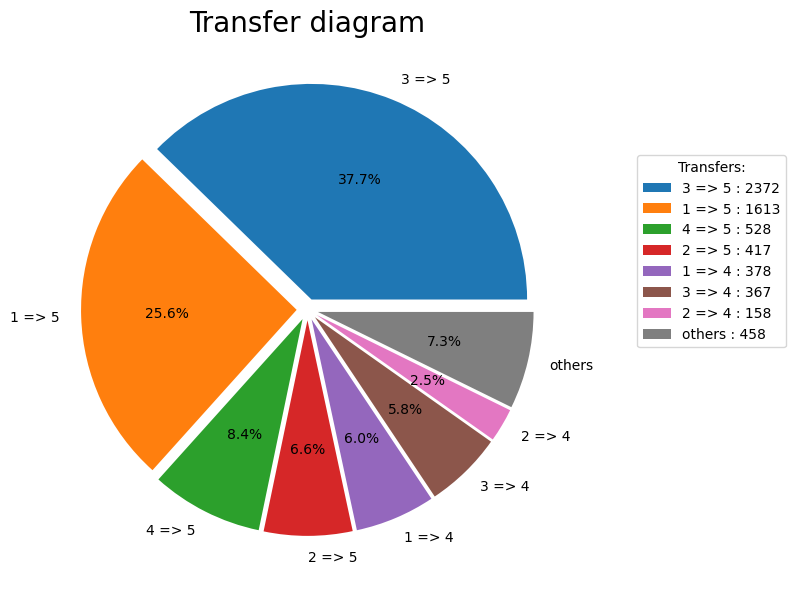

In [33]:
fig, ax = plt.subplots(figsize=(7, 7))
explode = [0.05 for i in range(len(flows_f))]
legends = list(flows_f['Transfers'].astype(str) + ' : ' + flows_f['N'].astype(str))
ax.pie(flows_f['N'], autopct="%1.1f%%", labels=flows_f['Transfers'], explode=explode)
plt.legend(legends, title = "Transfers:", loc='upper right',bbox_to_anchor=(1.4, 0.8))
plt.title('Transfer diagram', fontsize = 20)
plt.show()

# **Task_3_2**

In [34]:
df_Charges

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610
...,...,...,...
112590,4992,2016-10-01,8.078
112591,4747,2016-10-01,4.862
112592,4992,2016-11-01,9.978
112593,4747,2017-06-01,5.182


In [35]:
df_Tariff['change'] = 1 - df_Tariff['change'] 

In [36]:
df_Tariff['START_DTTM'] = pd.to_datetime(df_Tariff['START_DTTM'], format="%Y-%m-%d")
df_Tariff['END_DTTM'] = pd.to_datetime(df_Tariff['END_DTTM'][df_Tariff['T']==0], format="%Y-%m-%d")
df_Tariff['start_month'] = df_Tariff['START_DTTM'].dt.to_period('M') #, pd.to_datetime( format="%Y-%m")
df_Tariff['end_month'] = df_Tariff['END_DTTM'].dt.to_period('M')

In [37]:
df_Tariff

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,T,TARIFF_PLAN_ID_str,still,change,Trans,start_month,end_month
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,0,2,1,1.0,2 => 3,2013-11,2017-03
1,1,3,2017-03-11 14:24:18,NaT,1,3,1,0.0,3 => 1,2017-03,NaT
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,0,1,1,1.0,1 => 5,2016-02,2017-06
3,2,5,2017-06-29 12:39:59,NaT,1,5,1,0.0,5 => 1,2017-06,NaT
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,0,1,1,1.0,1 => 5,2015-05,2017-04
...,...,...,...,...,...,...,...,...,...,...,...
12282,5987,3,2017-05-23 13:07:57,NaT,1,3,1,0.0,3 => 1,2017-05,NaT
12283,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55,0,1,1,1.0,1 => 4,2017-05,2017-05
12284,5988,4,2017-05-22 16:36:56,NaT,1,4,1,0.0,4 => 5,2017-05,NaT
12285,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,0,5,1,1.0,5 => 1,2017-05,2017-05


In [38]:
Tariff_for_Charges = df_Tariff[df_Tariff['change']==1].drop(['START_DTTM', 'END_DTTM'], axis=1)

In [39]:
Tariff_for_Charges

,SUBSCRIBER_ID,TARIFF_PLAN_ID,T,TARIFF_PLAN_ID_str,still,change,Trans,start_month,end_month
0,1,2,0,2,1,1.0,2 => 3,2013-11,2017-03
2,2,1,0,1,1,1.0,1 => 5,2016-02,2017-06
4,3,1,0,1,1,1.0,1 => 5,2015-05,2017-04
6,4,3,0,3,1,1.0,3 => 5,2016-01,2017-01
8,5,1,0,1,1,1.0,1 => 5,2016-02,2017-05
...,...,...,...,...,...,...,...,...,...
12277,5985,4,0,4,1,1.0,4 => 5,2017-04,2017-06
12279,5986,5,0,5,1,1.0,5 => 1,2017-05,2017-06
12281,5987,5,0,5,1,1.0,5 => 3,2017-05,2017-05
12283,5988,1,0,1,1,1.0,1 => 4,2017-05,2017-05


In [40]:
df_Charges['BILL_MONTH'] = pd.to_datetime(df_Charges['BILL_MONTH'], format="%Y-%m-%d")
df_Charges['BILL_MONTH'] = df_Charges['BILL_MONTH'].dt.to_period('M')

In [41]:
df_Charges

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03,4.572
1,1754,2017-05,4.894
2,381,2017-01,6.670
3,5832,2016-12,4.299
4,5277,2017-03,1.610
...,...,...,...
112590,4992,2016-10,8.078
112591,4747,2016-10,4.862
112592,4992,2016-11,9.978
112593,4747,2017-06,5.182


In [42]:
Tariff_for_Charges

,SUBSCRIBER_ID,TARIFF_PLAN_ID,T,TARIFF_PLAN_ID_str,still,change,Trans,start_month,end_month
0,1,2,0,2,1,1.0,2 => 3,2013-11,2017-03
2,2,1,0,1,1,1.0,1 => 5,2016-02,2017-06
4,3,1,0,1,1,1.0,1 => 5,2015-05,2017-04
6,4,3,0,3,1,1.0,3 => 5,2016-01,2017-01
8,5,1,0,1,1,1.0,1 => 5,2016-02,2017-05
...,...,...,...,...,...,...,...,...,...
12277,5985,4,0,4,1,1.0,4 => 5,2017-04,2017-06
12279,5986,5,0,5,1,1.0,5 => 1,2017-05,2017-06
12281,5987,5,0,5,1,1.0,5 => 3,2017-05,2017-05
12283,5988,1,0,1,1,1.0,1 => 4,2017-05,2017-05


In [43]:
CH_T = pd.merge(df_Charges, Tariff_for_Charges, how='left', on='SUBSCRIBER_ID').drop(['TARIFF_PLAN_ID'], axis=1)

In [44]:
CH_T_sort = CH_T.sort_values(by=['SUBSCRIBER_ID', 'BILL_MONTH']).reset_index().drop('index', axis=1)#.shift(-1)

In [45]:
abs(CH_T_sort['BILL_MONTH'].astype('int') - CH_T_sort['end_month'].astype('int'))

0         9
1         8
2         7
3         6
4         5
         ..
118331    3
118332    4
118333    5
118334    6
118335    7
Length: 118336, dtype: int64

In [46]:
CH_T_sort['prev_3'] = CH_T_sort['CHARGES'].rolling(window=3).sum()

In [47]:
# CH_T_sort['CHARGES'].rolling_sum(ts[::-1], window=3, min_periods=0)[::-1]

CH_T_sort['next_3'] = CH_T_sort['CHARGES'][::-1].rolling(window=3).sum()[::-1]

In [48]:
CH_T_sort['diff_change_month'] = CH_T_sort['BILL_MONTH'].astype('int') - CH_T_sort['end_month'].astype('int')

In [49]:
CH_T_sort

,SUBSCRIBER_ID,BILL_MONTH,CHARGES,T,TARIFF_PLAN_ID_str,still,change,Trans,start_month,end_month,prev_3,next_3,diff_change_month
0,1,2016-06,21.137,0,2,1,1.0,2 => 3,2013-11,2017-03,NaN,83.724,-9
1,1,2016-07,32.545,0,2,1,1.0,2 => 3,2013-11,2017-03,NaN,87.551,-8
2,1,2016-08,30.042,0,2,1,1.0,2 => 3,2013-11,2017-03,83.724,82.634,-7
3,1,2016-09,24.964,0,2,1,1.0,2 => 3,2013-11,2017-03,87.551,74.966,-6
4,1,2016-10,27.628,0,2,1,1.0,2 => 3,2013-11,2017-03,82.634,71.134,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118331,5989,2017-08,5.122,0,5,1,1.0,5 => 1,2017-05,2017-05,15.206,16.942,3
118332,5989,2017-09,6.068,0,5,1,1.0,5 => 1,2017-05,2017-05,16.206,16.908,4
118333,5989,2017-10,5.752,0,5,1,1.0,5 => 1,2017-05,2017-05,16.942,16.066,5
118334,5989,2017-11,5.088,0,5,1,1.0,5 => 1,2017-05,2017-05,16.908,NaN,6


In [50]:
df_next_3 = CH_T_sort[CH_T_sort['diff_change_month'] == 3][['SUBSCRIBER_ID', 'Trans', 'prev_3']].reset_index().drop('index', axis=1)

In [51]:
df_next_3

,SUBSCRIBER_ID,Trans,prev_3
0,1,2 => 3,75.121
1,2,1 => 5,15.396
2,3,1 => 5,14.992
3,4,3 => 5,14.436
4,5,1 => 5,14.364
...,...,...,...
6293,5985,4 => 5,15.409
6294,5986,5 => 1,45.613
6295,5987,5 => 3,11.619
6296,5988,1 => 4,28.654


In [52]:
df_prev_3 = CH_T_sort[CH_T_sort['diff_change_month'] == -3][['SUBSCRIBER_ID', 'Trans', 'next_3']].reset_index().drop('index', axis=1)

In [53]:
df_prev_3

,SUBSCRIBER_ID,Trans,next_3
0,1,2 => 3,69.258
1,2,1 => 5,16.775
2,3,1 => 5,15.579
3,4,3 => 5,20.010
4,5,1 => 5,11.161
...,...,...,...
6239,5961,5 => 3,18.036
6240,5963,4 => 5,31.477
6241,5966,4 => 5,8.498
6242,5972,4 => 5,5.234


In [54]:
goal_2 = pd.merge(df_next_3, df_prev_3, how='inner', on=['SUBSCRIBER_ID', 'Trans'])

In [55]:
goal_2['gain'] = goal_2['next_3'] - goal_2['prev_3']
goal_2

,SUBSCRIBER_ID,Trans,prev_3,next_3,gain
0,1,2 => 3,75.121,69.258,-5.863
1,2,1 => 5,15.396,16.775,1.379
2,3,1 => 5,14.992,15.579,0.587
3,4,3 => 5,14.436,20.010,5.574
4,5,1 => 5,14.364,11.161,-3.203
...,...,...,...,...,...
6287,5961,5 => 3,48.480,18.036,-30.444
6288,5963,4 => 5,15.546,31.477,15.931
6289,5966,4 => 5,18.216,8.498,-9.718
6290,5972,4 => 5,15.189,5.234,-9.955


In [56]:
hist_2 = goal_2[goal_2['Trans'] != '5 => 5'].groupby('Trans').agg({'gain': 'sum'}).sort_values(by='gain', ascending=False)

In [57]:
hist_2

,gain
Trans,
3 => 5,15509.061
1 => 5,9863.770
3 => 4,2574.754
1 => 4,2025.366
2 => 5,1979.606
2 => 4,825.824
4 => 5,377.380
5 => 4,283.971
2 => 3,210.619


In [58]:
round(hist_2.gain.mean())

1544

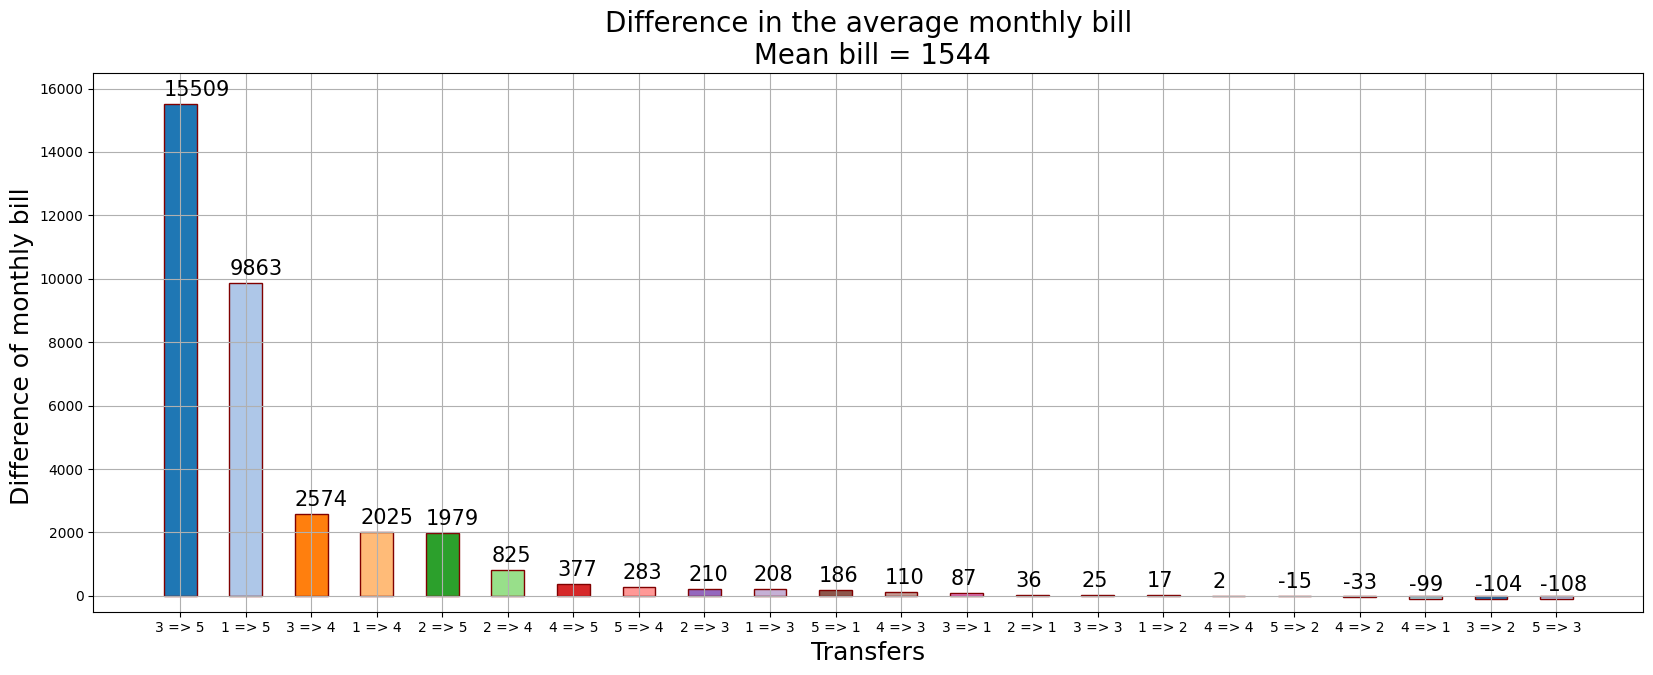

In [59]:
# hist_2.plot.bar()
plt.figure(figsize=[20, 7])

# plt.bar(hist_2.index, hist_2.gain, width=0.7, bottom=50, align='edge')

col_map = plt.get_cmap('tab20')

# Creating a bar chart from the DataFrame df
pl = plt.bar(hist_2.index, hist_2.gain.astype(int), width=0.5, color=col_map.colors, 
        edgecolor='maroon', linewidth=1)


for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x(), bar.get_height()+250), 
                     fontsize=15)

plt.xlabel('Transfers', fontsize = 18)
plt.ylabel('Difference of monthly bill ', fontsize = 18)
plt.title('Difference in the average monthly bill\n Mean bill = {}'.format(round(hist_2.gain.mean())), fontsize = 20)
plt.ylim([-500, 16500])
plt.grid()

# **Task_3_3**

In [67]:
df_Susp

,SUBSCRIBER_ID,START_DT,END_DT,STATUS
0,5195,2017-12-27,2017-12-27,Suspended
1,5198,2017-04-18,2017-04-18,Suspended
2,381,2017-04-18,2017-04-20,Suspended
3,3500,2017-12-21,$null$,Suspended
4,3302,2016-08-23,2016-09-07,Suspended
...,...,...,...,...
4058,2166,2016-07-23,2016-07-24,Suspended
4059,2166,2016-07-02,2016-07-05,Suspended
4060,2166,2016-06-18,2016-06-21,Suspended
4061,2166,2016-06-11,2016-06-11,Suspended


In [68]:
df_Susp['START_DT'] = pd.to_datetime(df_Susp['START_DT'], format="%Y-%m-%d")
df_Susp['END_DT'] = pd.to_datetime(df_Susp['END_DT'][df_Susp['END_DT']!='$null$'], format="%Y-%m-%d")
df_Susp['start_month'] = df_Susp['START_DT'].dt.to_period('M') #, pd.to_datetime( format="%Y-%m")
df_Susp['end_month'] = df_Susp['END_DT'].dt.to_period('M')

In [69]:
susp = df_Susp.sort_values(by=['SUBSCRIBER_ID', 'start_month']).reset_index().drop('index', axis=1)

# df_Susp.groupby('SUBSCRIBER_ID').agg({'STATUS', ''})

In [70]:
susp.rename(columns={'start_month': 'susp_start_month', 'end_month': 'susp_end_month'}, inplace=True)

In [71]:
susp

,SUBSCRIBER_ID,START_DT,END_DT,STATUS,susp_start_month,susp_end_month
0,5,2016-07-25,2016-08-14,Suspended,2016-07,2016-08
1,5,2016-09-19,2016-09-28,Suspended,2016-09,2016-09
2,5,2016-11-22,2016-11-28,Suspended,2016-11,2016-11
3,5,2017-03-23,2017-04-15,Suspended,2017-03,2017-04
4,5,2017-06-16,2017-06-29,Suspended,2017-06,2017-06
...,...,...,...,...,...,...
4058,5987,2017-05-19,2017-05-22,Suspended,2017-05,2017-05
4059,5987,2017-07-09,2017-08-15,Suspended,2017-07,2017-08
4060,5988,2017-07-23,2017-07-23,Suspended,2017-07,2017-07
4061,5988,2017-09-25,2017-10-08,Suspended,2017-09,2017-10


In [72]:
susp = susp.groupby('SUBSCRIBER_ID').agg({'susp_start_month': 'value_counts'}).rename(columns={'susp_start_month': 'N_per_month'}).reset_index()

In [73]:
Tariff_for_Charges
# CH_T = pd.merge(df_Charges, Tariff_for_Charges, how='left', on='SUBSCRIBER_ID').drop(['TARIFF_PLAN_ID'], axis=1)

,SUBSCRIBER_ID,TARIFF_PLAN_ID,T,TARIFF_PLAN_ID_str,still,change,Trans,start_month,end_month
0,1,2,0,2,1,1.0,2 => 3,2013-11,2017-03
2,2,1,0,1,1,1.0,1 => 5,2016-02,2017-06
4,3,1,0,1,1,1.0,1 => 5,2015-05,2017-04
6,4,3,0,3,1,1.0,3 => 5,2016-01,2017-01
8,5,1,0,1,1,1.0,1 => 5,2016-02,2017-05
...,...,...,...,...,...,...,...,...,...
12277,5985,4,0,4,1,1.0,4 => 5,2017-04,2017-06
12279,5986,5,0,5,1,1.0,5 => 1,2017-05,2017-06
12281,5987,5,0,5,1,1.0,5 => 3,2017-05,2017-05
12283,5988,1,0,1,1,1.0,1 => 4,2017-05,2017-05


In [74]:
sups_tariff = pd.merge(susp, Tariff_for_Charges, how='left', on='SUBSCRIBER_ID').drop(['TARIFF_PLAN_ID'], axis=1)

In [75]:
sups_tariff

,SUBSCRIBER_ID,susp_start_month,N_per_month,T,TARIFF_PLAN_ID_str,still,change,Trans,start_month,end_month
0,5,2016-07,1,0,1,1,1.0,1 => 5,2016-02,2017-05
1,5,2016-09,1,0,1,1,1.0,1 => 5,2016-02,2017-05
2,5,2016-11,1,0,1,1,1.0,1 => 5,2016-02,2017-05
3,5,2017-03,1,0,1,1,1.0,1 => 5,2016-02,2017-05
4,5,2017-06,1,0,1,1,1.0,1 => 5,2016-02,2017-05
...,...,...,...,...,...,...,...,...,...,...
3941,5985,2017-08,1,0,4,1,1.0,4 => 5,2017-04,2017-06
3942,5987,2017-05,2,0,5,1,1.0,5 => 3,2017-05,2017-05
3943,5987,2017-07,1,0,5,1,1.0,5 => 3,2017-05,2017-05
3944,5988,2017-09,2,0,1,1,1.0,1 => 4,2017-05,2017-05


In [76]:
sups_tariff['diff_month'] = sups_tariff['susp_start_month'].astype('int') - sups_tariff['end_month'].astype('int')
# sups_tariff['next_3'] = sups_tariff['N_per_month'][::-1].rolling(window=3).sum()[::-1]
# sups_tariff['prev_3'] = sups_tariff['N_per_month '].rolling(window=3).sum()

In [77]:
sups_tariff_diff = sups_tariff[(sups_tariff['diff_month']<=3) & (sups_tariff['diff_month']>=-3) & (sups_tariff['diff_month']!=0)]

In [78]:
sups_tariff_diff['prev/next'] = np.where(sups_tariff_diff['diff_month']>0, 'next', 'prev')

In [79]:
sups_tariff_diff

,SUBSCRIBER_ID,susp_start_month,N_per_month,T,TARIFF_PLAN_ID_str,still,change,Trans,start_month,end_month,diff_month,prev/next
3,5,2017-03,1,0,1,1,1.0,1 => 5,2016-02,2017-05,-2,prev
4,5,2017-06,1,0,1,1,1.0,1 => 5,2016-02,2017-05,1,next
5,5,2017-07,1,0,1,1,1.0,1 => 5,2016-02,2017-05,2,next
9,8,2017-04,1,0,3,1,1.0,3 => 4,2016-01,2017-02,2,next
13,9,2016-11,1,0,3,1,1.0,3 => 4,2010-05,2017-02,-3,prev
...,...,...,...,...,...,...,...,...,...,...,...,...
3939,5985,2017-05,1,0,4,1,1.0,4 => 5,2017-04,2017-06,-1,prev
3940,5985,2017-07,1,0,4,1,1.0,4 => 5,2017-04,2017-06,1,next
3941,5985,2017-08,1,0,4,1,1.0,4 => 5,2017-04,2017-06,2,next
3943,5987,2017-07,1,0,5,1,1.0,5 => 3,2017-05,2017-05,2,next


In [80]:
hist_3 = sups_tariff_diff.pivot_table(
               index=["Trans"],
               values=["N_per_month"],
               columns=["prev/next"],
               aggfunc=[np.sum]).droplevel([0,1], axis=1).rename_axis(None, axis=1).reset_index().fillna(0)

In [81]:
hist_3['integrity'] = hist_3['next'] - hist_3['prev']

In [82]:
hist_3 = hist_3.sort_values(by='integrity').reset_index()

In [83]:
hist_3.drop('index', axis=1, inplace=True)

In [84]:
hist_3 = hist_3[hist_3['Trans'] != '5 => 5']

In [85]:
hist_3

,Trans,next,prev,integrity
0,3 => 5,178.0,290.0,-112.0
1,3 => 4,84.0,116.0,-32.0
2,4 => 5,108.0,139.0,-31.0
3,1 => 5,131.0,160.0,-29.0
4,3 => 2,1.0,10.0,-9.0
5,1 => 4,54.0,62.0,-8.0
6,4 => 3,16.0,20.0,-4.0
7,1 => 3,1.0,3.0,-2.0
8,3 => 1,2.0,4.0,-2.0
9,4 => 2,2.0,3.0,-1.0


In [86]:
hist_3['integrity'].mean()

-8.833333333333334

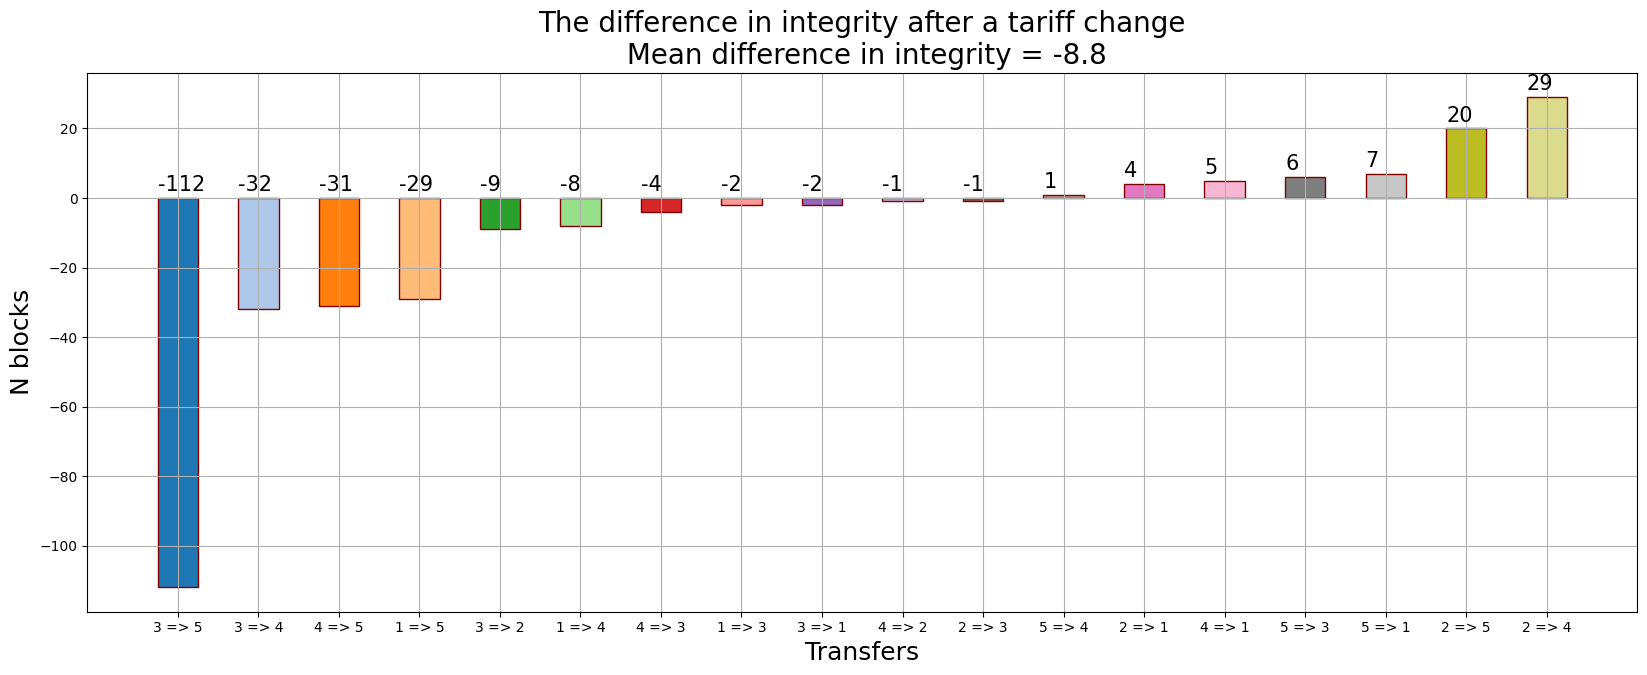

In [87]:
plt.figure(figsize=[20, 7])

# plt.bar(hist_2.index, hist_2.gain, width=0.7, bottom=50, align='edge')

col_map = plt.get_cmap('tab20')

# Creating a bar chart from the DataFrame df
pl = plt.bar(hist_3.Trans, hist_3.integrity.astype(int), width=0.5, color=col_map.colors, 
        edgecolor='maroon', linewidth=1)


for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x(), np.maximum(bar.get_height(), 0)+2), 
                     fontsize=15)
    
plt.xlabel('Transfers', fontsize = 18)
plt.ylabel('N blocks', fontsize = 18)

plt.title('The difference in integrity after a tariff change\n Mean difference in integrity = {}'.format(round(hist_3['integrity'].mean(), 1)), fontsize = 20)
plt.grid()